In [144]:
import pandas as pd
import numpy as np

In [145]:
# link of the dataset : https://www.kaggle.com/code/ashydv/sales-prediction-simple-linear-regression/input
sales=pd.read_csv('advertising.csv')

In [146]:
sales.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [147]:
sales.shape

(200, 4)

In [148]:
sales.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

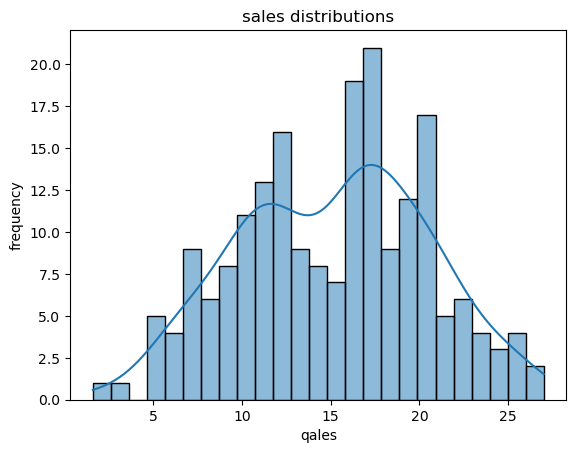

In [150]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

# Plotting the histogram
sns.histplot(sales['Sales'], bins=25, kde=True)
plt.title('sales distributions')
plt.xlabel('qales')
plt.ylabel('frequency')
plt.show()

Text(0, 0.5, 'TV')

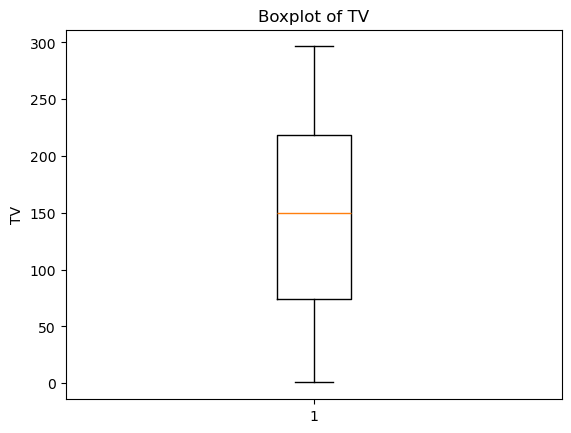

In [151]:
#ANALYSING OUTLIERS USING BOX PLOT

plt.boxplot(sales['TV'])
plt.title('Boxplot of TV')
plt.ylabel('TV')

Text(0, 0.5, 'Radio')

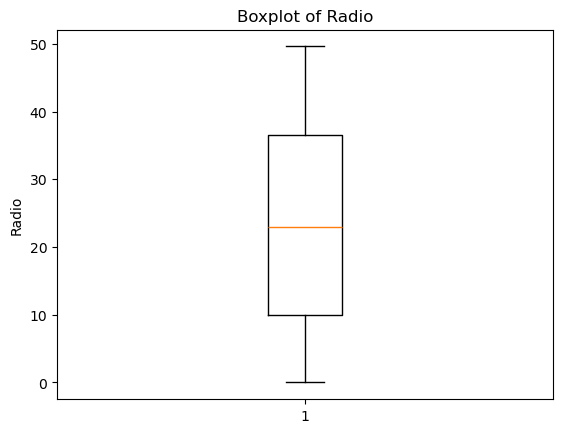

In [152]:
plt.boxplot(sales['Radio'])
plt.title('Boxplot of Radio')
plt.ylabel('Radio')

Text(0, 0.5, 'Radio')

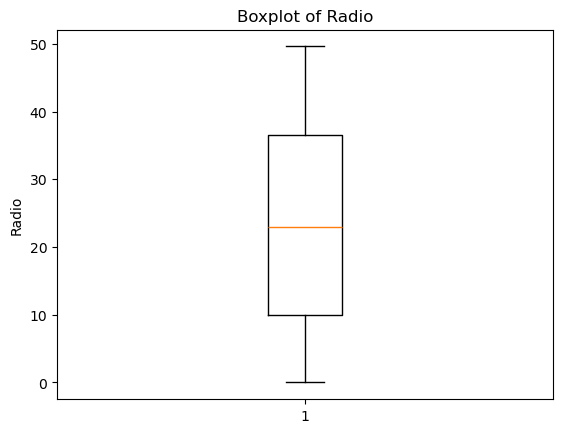

In [153]:
plt.boxplot(sales['Radio'])
plt.title('Boxplot of Radio')
plt.ylabel('Radio')

Text(0, 0.5, 'Newspaper')

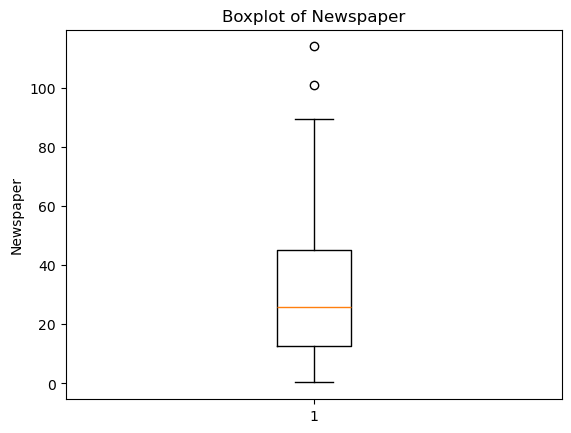

In [154]:
plt.boxplot(sales['Newspaper'])
plt.title('Boxplot of Newspaper')
plt.ylabel('Newspaper')

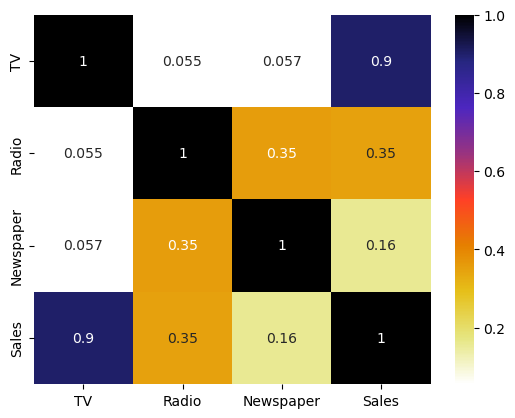

In [155]:
# analyzing correlation
cor=sales.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [156]:
from sklearn.model_selection import train_test_split

#as we can see the newspaper column has certain outliers and has least correlation with the target Sales column, we can drop this column.
x=sales[['TV','Radio']]
y=sales['Sales']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.25)

In [157]:
#normlizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_X_train = scaler.fit_transform(X_train)
normalized_X_test = scaler.transform(X_test)

In [158]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(normalized_X_train, Y_train)

LinearRegression()

In [159]:
y_pred = model.predict(normalized_X_test)

In [160]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 2.11
R^2 Score: 0.91


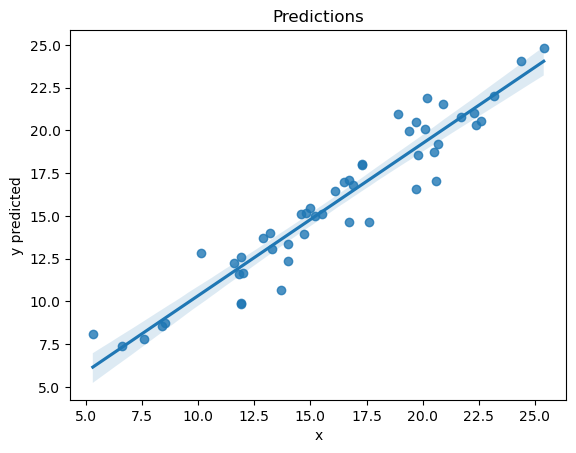

In [161]:
sns.regplot(x = Y_test, 
            y = y_pred, 
            data = sales)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.title('Predictions')
plt.show()